<a href="https://colab.research.google.com/github/Ghiscode/Pengolahan-Citra-Digital/blob/main/Restorasi%20-%20Citra%20-%20Sesi%20-%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mughis Fadhil A. Ridwan**

**20230040217**

**Pengolahan Citra Digital**

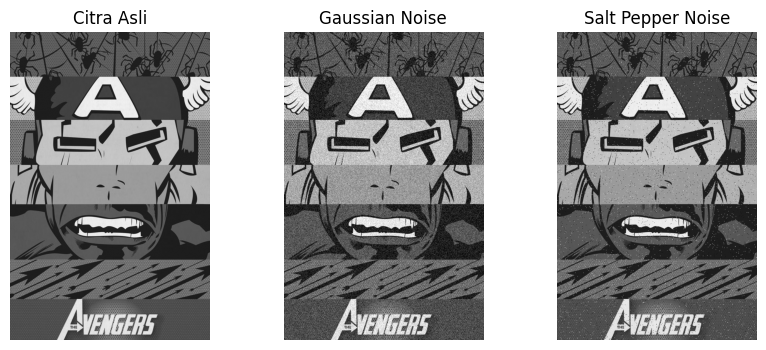

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. MEMBACA GAMBAR
img = cv2.imread("marvel.jpeg", cv2.IMREAD_GRAYSCALE)

# 2. GAUSSIAN NOISE
gaussian = img + np.random.normal(0, 25, img.shape)
gaussian = np.clip(gaussian, 0, 255).astype("uint8")

# 3. SALT & PEPPER NOISE
saltpep = img.copy()
prob = 0.02
rnd = np.random.rand(*img.shape)
saltpep[rnd < prob/2] = 0
saltpep[rnd > 1 - prob/2] = 255

# TAMPILKAN HASIL NOISE
plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Citra Asli"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(gaussian, cmap='gray'); plt.title("Gaussian Noise"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(saltpep, cmap='gray'); plt.title("Salt Pepper Noise"); plt.axis('off')
plt.show()

**Perbedaan Visual Antara Gaussian Noise dan Salt-Pepper Noise**

1. **Gaussian Noise :** Secara visual terlihat seperti "bercak" atau butiran pasir halus yang merata di seluruh gambar (grainy). Noise ini mengubah intensitas hampir seluruh piksel pada gambar dengan variasi acak (terang/gelap) mengikuti distribusi normal. Gambar menjadi terlihat kusam atau tidak jernih.
2. **Salt-Pepper Noise :** Secara visual terlihat seperti taburan garam (titik putih) dan merica (titik hitam) yang muncul secara acak. Berbeda dengan Gaussian, noise ini tidak merusak semua piksel; sebagian besar piksel tetap asli, namun ada beberapa piksel yang nilainya berubah drastis menjadi 0 (hitam) atau 255 (putih).


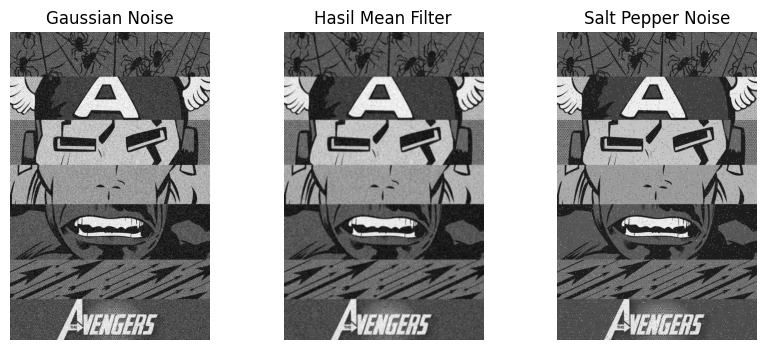

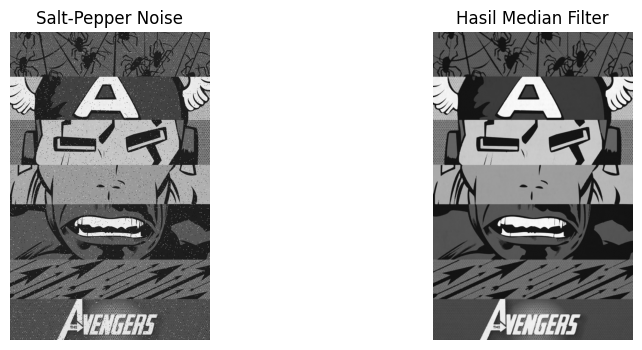

In [7]:
# FILTER MEAN (digunakan untuk mereduksi Gaussian Noise)
mean = cv2.blur(gaussian, (3,3))

# FILTER MEDIAN (digunakan untuk mereduksi Salt-Pepper Noise)
median = cv2.medianBlur(saltpep, 3)

# TAMPILKAN HASIL RESTORASI GAUSSIAN (Mean Filter)
plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.imshow(gaussian, cmap='gray'); plt.title("Gaussian Noise"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(mean, cmap='gray'); plt.title("Hasil Mean Filter"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(saltpep, cmap='gray'); plt.title("Salt Pepper Noise"); plt.axis('off')
plt.show()

# TAMPILKAN HASIL RESTORASI SALT-PEPPER (Median Filter)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(saltpep, cmap='gray'); plt.title("Salt-Pepper Noise"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(median, cmap='gray'); plt.title("Hasil Median Filter"); plt.axis('off')
plt.show()

**Perbandingan antara Mean Filter dan Median Filter dan Filter mana yang lebih baik untuk menghilangkan Gaussian Noise dan Salt-Pepper Noise**

*   **Gaussian Noise > Mean Filter :** Gaussian noise adalah variasi nilai piksel di sekitar nilai aslinya. Mean filter bekerja dengan merata-ratakan nilai piksel tetangga, sehingga variasi acak tersebut "saling meniadakan" dan gambar menjadi lebih halus

* **Salt-Pepper Noise > Median Filter :** Mean filter buruk untuk Salt-Pepper karena ia akan merata-ratakan titik hitam/putih ekstrem dengan piksel sekitarnya, sehingga noise justru menyebar menjadi noda buram.  



In [8]:
# ===== PSNR Evaluation =====
def PSNR(original, restored):
    mse = np.mean((original - restored) ** 2)
    if mse == 0: # tidak ada perbedaan sama sekali
        return 100
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

psnr_mean = PSNR(img, mean)
psnr_median = PSNR(img, median)

print("=== Evaluasi PSNR ===")
print(f"PSNR hasil Mean Filter   : {psnr_mean:.2f} dB")
print(f"PSNR hasil Median Filter : {psnr_median:.2f} dB")

=== Evaluasi PSNR ===
PSNR hasil Mean Filter   : 30.14 dB
PSNR hasil Median Filter : 35.24 dB


1. Filter mana yang menghasilkan nilai PSNR lebih tinggi untuk Gaussian Noise?
2. Filter mana yang menghasilkan nilai PSNR lebih tinggi untuk Salt-Pepper Noise?
3. Bagaimana kesesuaian hasil PSNR dengan pengamatan visual dari praktikum sebelumnya?




---


1. **Mean Filter** Karena akan menghasilkan PSNR yang sedikit lebih tinggi atau seimbang dibandingkan Median Filter untuk kasus Gaussian Noise karena bisa mereduksi variasi standar deviasi dari noise nya
2. **Median Filter** Karena akan menghasilkan nilai PSNR yang jauh lebih tinggi dibandingkan Mean Filter karena kemampuannya yang mampu menghilangkan noise impuls.
3. **Sangat Sesuai** karena jika kita melihat median filter membuat gambar **Salt-Pepper** menjadi bersih kembali dan jika secara visual gambarnya buram, maka nilai PNSR nya pun akan rendah. Semakin tinggi nilai PSNR, semakin baik kualitas visual gambar hasil restorasi tersebut.


